# BUILDING THE TRAINED MODEL

DATA PREPROCESSING

In [102]:
import pandas as pd

In [103]:
dataset = pd.read_csv('../dataset/train_dataset.csv', index_col = 0)

In [104]:
dataset.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.0,0.0,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.0,1
251,TRANSFER,2806.00,2806.0,0.0,0.0,0.0,1
252,CASH_OUT,2806.00,2806.0,0.0,26202.0,0.0,1
320,PAYMENT,14420.66,0.0,0.0,0.0,0.0,0


In [105]:
import numpy as np

In [106]:
dataset.shape

(16426, 7)

In [107]:
x = dataset.iloc[ : , : 6].values
y = dataset.iloc[ : , 6].values

In [108]:
x.shape

(16426, 6)

In [109]:
y


array([1, 1, 1, ..., 1, 1, 1], shape=(16426,))

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [112]:
x_train.shape

(13962, 6)

In [113]:
x_test.shape

(2464, 6)

In [114]:
fraud = np.count_nonzero(y_train == 1)
valid = np.count_nonzero(y_train == 0)

In [115]:
print('Fraud cases in training data =', fraud)
print('Valid cases in training data =', valid)

Fraud cases in training data = 6961
Valid cases in training data = 7001


In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [117]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
categorical_cols = ['type']  # Add other categorical columns if needed

for col in categorical_cols:
    if col in dataset.columns:
        le = LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col].astype(str))
        label_encoders[col] = le

# Now extract features and target
x = dataset.iloc[:, :6].values
y = dataset.iloc[:, 6].values

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# NOW scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [118]:
x_train[ : 5]

array([[ 1.27763465, -0.31357738, -0.30582338, -0.20675651, -0.28490543,
        -0.36966534],
       [ 1.27763465, -0.32802919, -0.31409425, -0.20675651, -0.28490543,
        -0.36966534],
       [ 1.27763465, -0.15415044, -0.37841339, -0.20675651,  0.77553736,
         0.70115254],
       [ 1.27763465, -0.40416175, -0.35766548, -0.20675651, -0.28490543,
        -0.36966534],
       [-1.42023815, -0.355535  ,  1.12504762,  1.80319217, -0.04407677,
        -0.20848876]])

In [119]:
x_test[ : 5]

array([[ 1.27763465, -0.30316218, -0.34279611, -0.20675651, -0.21216671,
        -0.23186444],
       [-0.74576995,  0.86647036,  0.36952663, -0.20675651, -0.26980838,
         0.35837169],
       [-0.74576995,  0.10717767, -0.06502217, -0.20675651,  1.24115594,
         1.31030661],
       [ 1.27763465,  0.35481449,  0.07670221, -0.20675651, -0.28490543,
        -0.36966534],
       [ 0.60316645, -0.42992051, -0.3680821 , -0.20115508, -0.28490543,
        -0.36966534]])

LOGISTIC REGRESSION (LR)

In [120]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [121]:
y_pred = LR_model.predict(x_test)

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
acc_lr = accuracy_score(y_test, y_pred)

In [124]:
print(acc_lr)

0.8794642857142857


SUPPORT VECTOR MACHINE (SVM)

In [125]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0)
SVM_model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [126]:
y_pred = SVM_model.predict(x_test)

In [127]:
acc_svm = accuracy_score(y_test, y_pred)

In [128]:
print(acc_svm)

0.875


NAIVE BAYES (NB)

In [129]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [130]:
y_pred = NB_model.predict(x_test)

In [131]:
acc_nb = accuracy_score(y_test, y_pred)

In [132]:
print(acc_nb)

0.7938311688311688


RANDOM FOREST (RF)

In [133]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [134]:
y_pred = RF_model.predict(x_test)

In [135]:
acc_rf = accuracy_score(y_test, y_pred)

In [136]:
print(f"Random Forest Accuracy: {acc_rf * 100:.2f}%")

Random Forest Accuracy: 99.47%


---
# MODEL PERFORMANCE EVALUATION

**4 Algorithms Used:**
1. **Logistic Regression (LR)** - Linear classifier, fast and interpretable baseline
2. **Support Vector Machine (SVM)** - Kernel-based method for complex boundaries
3. **Naive Bayes (NB)** - Probabilistic classifier, computationally efficient
4. **Random Forest (RF)** - Ensemble method, best for handling non-linear patterns

These represent **linear**, **kernel-based**, **probabilistic**, and **ensemble** approaches for comprehensive fraud detection comparison.

In [137]:
# ============================================================
# PERFORMANCE EVALUATION - ALL 4 MODELS
# ============================================================

# Import required libraries
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create output directory
OUTPUT_DIR = './model/figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Store all 4 models
models = {
    'Logistic Regression': LR_model,
    'Support Vector Machine': SVM_model,
    'Naive Bayes': NB_model,
    'Random Forest': RF_model
}

# Evaluate and store results
results = []

print("="*70)
print("        PERFORMANCE METRICS - 4 ML ALGORITHMS")
print("="*70)

for name, model in models.items():
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100
    rec = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })
    
    print(f"\n{name}")
    print("-"*40)
    print(f"  Accuracy:  {acc:.2f}%")
    print(f"  Precision: {prec:.2f}%")
    print(f"  Recall:    {rec:.2f}%")
    print(f"  F1-Score:  {f1:.2f}%")

# Create DataFrame
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)

print("\n" + "="*70)
print("\n📊 SUMMARY TABLE:")
print(results_df.to_string(index=False))
print(f"\n🏆 Best Model: {results_df.iloc[0]['Model']} ({results_df.iloc[0]['Accuracy']:.2f}% Accuracy)")

        PERFORMANCE METRICS - 4 ML ALGORITHMS

Logistic Regression
----------------------------------------
  Accuracy:  87.95%
  Precision: 98.67%
  Recall:    77.32%
  F1-Score:  86.70%



Support Vector Machine
----------------------------------------
  Accuracy:  87.50%
  Precision: 97.97%
  Recall:    77.00%
  F1-Score:  86.23%

Naive Bayes
----------------------------------------
  Accuracy:  79.38%
  Precision: 91.24%
  Recall:    65.73%
  F1-Score:  76.42%

Random Forest
----------------------------------------
  Accuracy:  99.47%
  Precision: 99.13%
  Recall:    99.84%
  F1-Score:  99.48%


📊 SUMMARY TABLE:
                 Model  Accuracy  Precision    Recall  F1-Score
         Random Forest 99.472403  99.127676 99.840256 99.482690
   Logistic Regression 87.946429  98.674822 77.316294 86.699507
Support Vector Machine 87.500000  97.967480 76.996805 86.225403
           Naive Bayes 79.383117  91.241685 65.734824 76.415970

🏆 Best Model: Random Forest (99.47% Accuracy)


## Confusion Matrices - All 4 Models

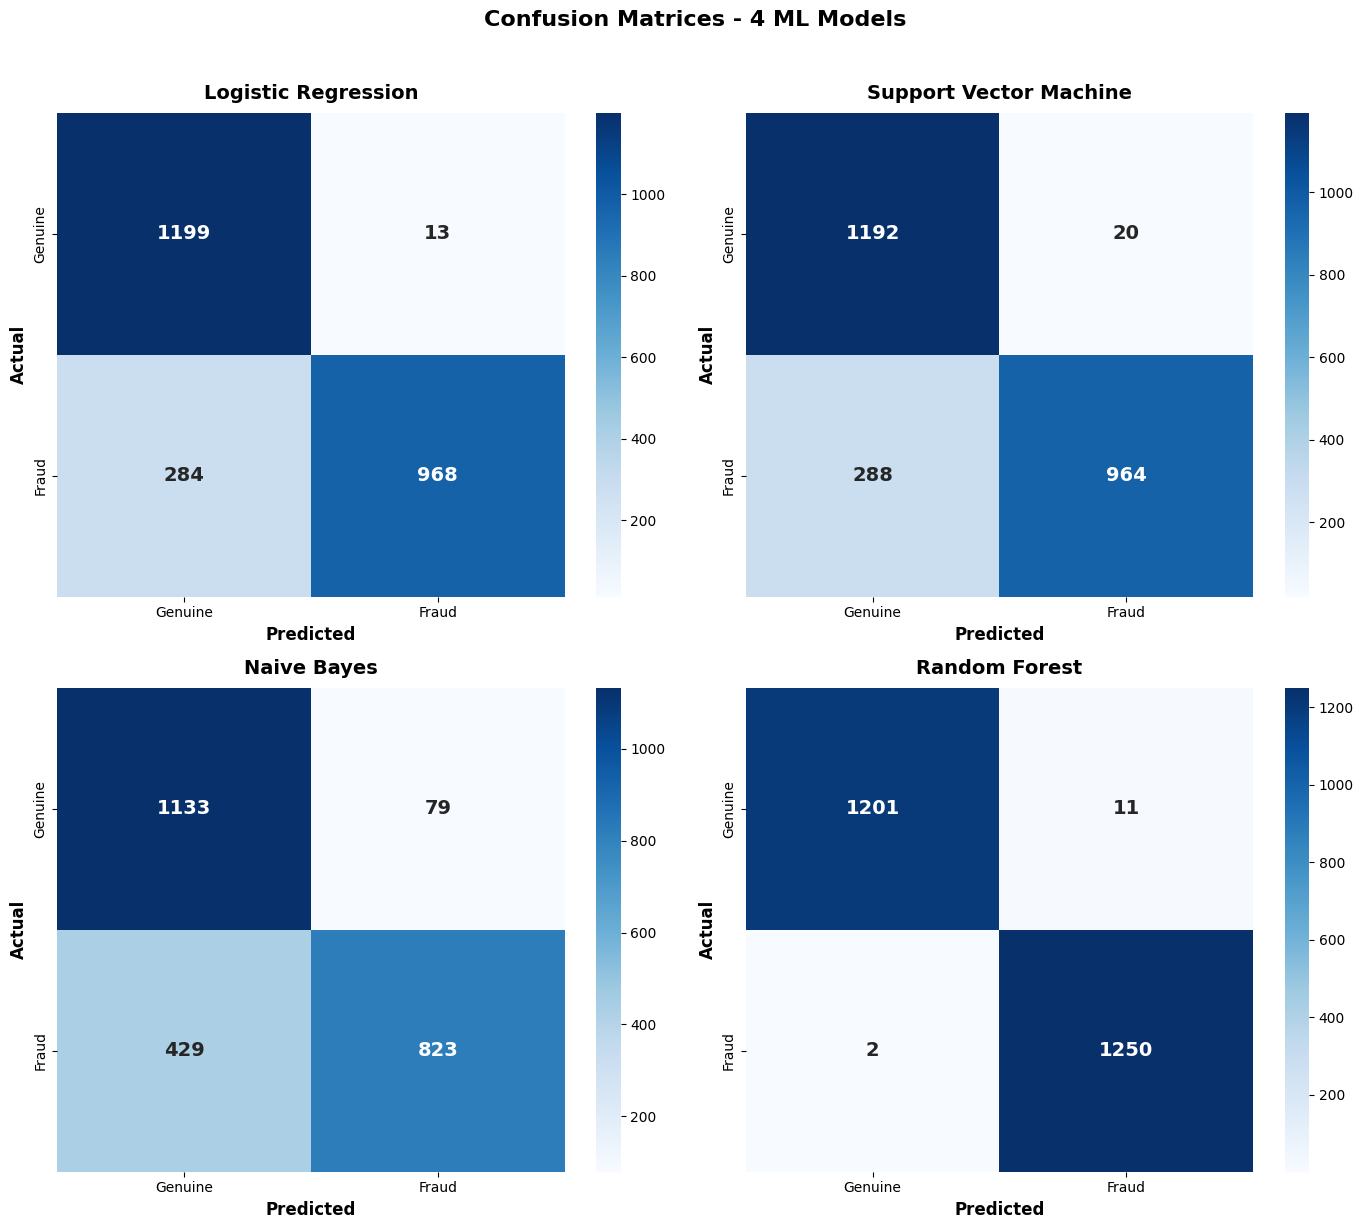

✓ Saved: ./model/figures/confusion_matrices_all.png


In [138]:
# ============================================================
# CONFUSION MATRICES - 2x2 Grid for all 4 models
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Genuine', 'Fraud'],
                yticklabels=['Genuine', 'Fraud'],
                annot_kws={'size': 14, 'weight': 'bold'})
    
    axes[idx].set_title(f'{name}', fontsize=14, fontweight='bold', pad=10)
    axes[idx].set_xlabel('Predicted', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=12, fontweight='bold')

plt.suptitle('Confusion Matrices - 4 ML Models', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/confusion_matrices_all.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: {OUTPUT_DIR}/confusion_matrices_all.png")

## Model Performance Comparison

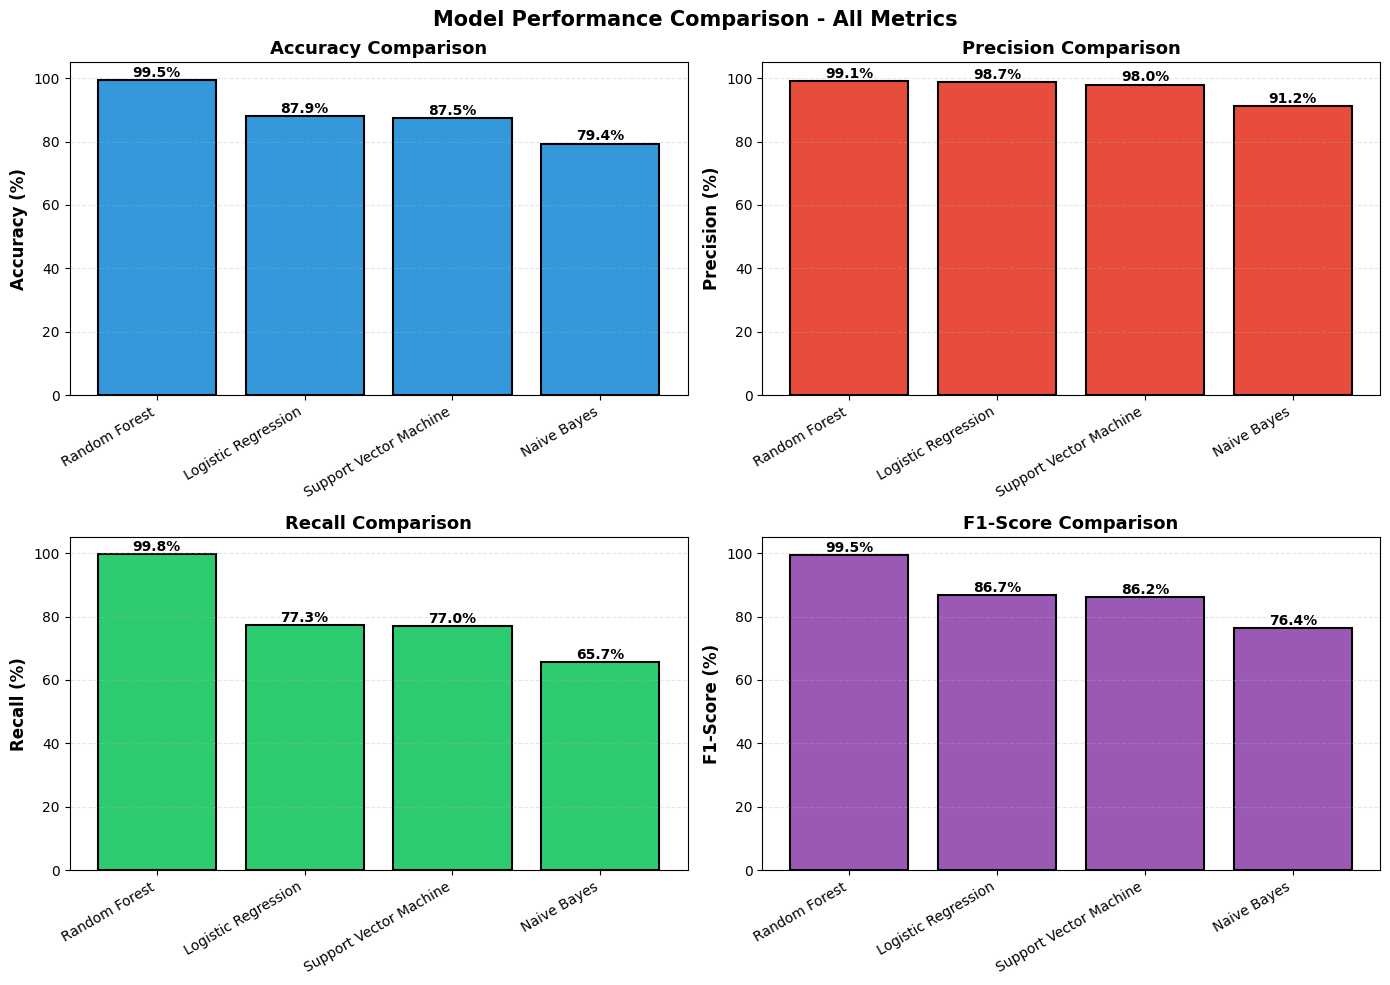

✓ Saved: ./model/figures/metrics_comparison.png


In [139]:
# ============================================================
# PERFORMANCE COMPARISON - All Metrics
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.bar(results_df['Model'], results_df[metric], 
                   color=colors[idx], edgecolor='black', linewidth=1.5)
    
    ax.set_ylabel(f'{metric} (%)', fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    ax.set_ylim(0, 105)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                f'{bar.get_height():.1f}%', ha='center', fontsize=10, fontweight='bold')
    
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, ha='right', fontsize=10)

plt.suptitle('Model Performance Comparison - All Metrics', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: {OUTPUT_DIR}/metrics_comparison.png")

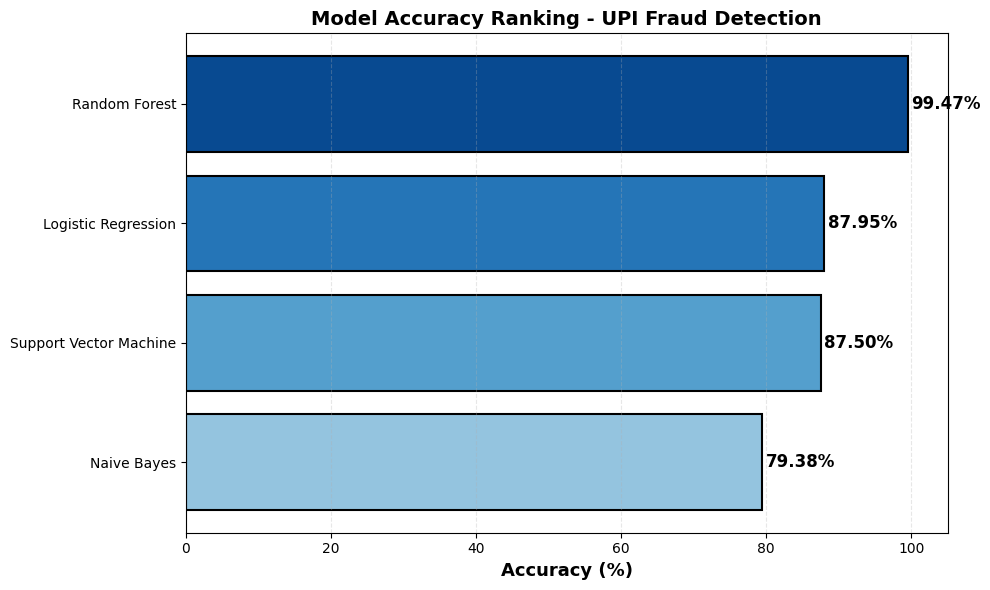

✓ Saved: ./model/figures/accuracy_ranking.png


In [140]:
# ============================================================
# MODEL RANKING - Accuracy Comparison
# ============================================================

fig, ax = plt.subplots(figsize=(10, 6))

sorted_df = results_df.sort_values('Accuracy', ascending=True)
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(sorted_df)))

bars = ax.barh(sorted_df['Model'], sorted_df['Accuracy'], color=colors, edgecolor='black', linewidth=1.5)

for bar, acc in zip(bars, sorted_df['Accuracy']):
    ax.text(acc + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{acc:.2f}%', va='center', fontsize=12, fontweight='bold')

ax.set_xlabel('Accuracy (%)', fontsize=13, fontweight='bold')
ax.set_title('Model Accuracy Ranking - UPI Fraud Detection', fontsize=14, fontweight='bold')
ax.set_xlim(0, 105)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/accuracy_ranking.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: {OUTPUT_DIR}/accuracy_ranking.png")

---
# SAVING THE BEST MODEL

Random Forest achieved the highest accuracy and is selected as the final model for deployment.

In [141]:
import os.path

In [142]:
import joblib

# Save Random Forest model (always save latest trained model)
model_path = './model/random_forest_model.joblib'
joblib.dump(RF_model, model_path)
print(f"✓ Random Forest model saved to: {model_path}")

# Save the scaler
scaler_path = './model/scaler.joblib'
joblib.dump(scaler, scaler_path)
print(f"✓ Scaler saved to: {scaler_path}")

✓ Random Forest model saved to: ./model/random_forest_model.joblib
✓ Scaler saved to: ./model/scaler.joblib


In [143]:
# Test loading and verify the saved model
loaded_model = joblib.load('./model/random_forest_model.joblib')
loaded_scaler = joblib.load('./model/scaler.joblib')

# Verify on test data
y_pred_test = loaded_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("="*50)
print("MODEL VERIFICATION")
print("="*50)
print(f"✓ Model loaded successfully!")
print(f"✓ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"✓ Model is ready for deployment!")

MODEL VERIFICATION
✓ Model loaded successfully!
✓ Test Accuracy: 99.47%
✓ Model is ready for deployment!


In [144]:
# ============================================================
# SUMMARY - Files Generated
# ============================================================

print("\n" + "="*60)
print("        BUILD COMPLETE - MODEL TRAINING SUMMARY")
print("="*60)

print("\n📊 VISUALIZATIONS SAVED:")
print(f"  1. {OUTPUT_DIR}/confusion_matrices_all.png")
print(f"  2. {OUTPUT_DIR}/metrics_comparison.png")
print(f"  3. {OUTPUT_DIR}/accuracy_ranking.png")

print("\n💾 MODEL FILES SAVED:")
print(f"  1. ./model/random_forest_model.joblib")
print(f"  2. ./model/scaler.joblib")

print(f"\n🏆 BEST MODEL: Random Forest")
print(f"   Accuracy: {results_df[results_df['Model']=='Random Forest']['Accuracy'].values[0]:.2f}%")

print("\n" + "="*60)
print("Ready for testing with test_model.ipynb")
print("="*60)


        BUILD COMPLETE - MODEL TRAINING SUMMARY

📊 VISUALIZATIONS SAVED:
  1. ./model/figures/confusion_matrices_all.png
  2. ./model/figures/metrics_comparison.png
  3. ./model/figures/accuracy_ranking.png

💾 MODEL FILES SAVED:
  1. ./model/random_forest_model.joblib
  2. ./model/scaler.joblib

🏆 BEST MODEL: Random Forest
   Accuracy: 99.47%

Ready for testing with test_model.ipynb
